# Lagrange Space 2D (1st order)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
from matplotlib.patches import Polygon


## Local basis functions

In [5]:
plt.clf()

# laod the local basis data
global_basis_data = pd.read_csv('~2D_lagrange_local_basis.csv')

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

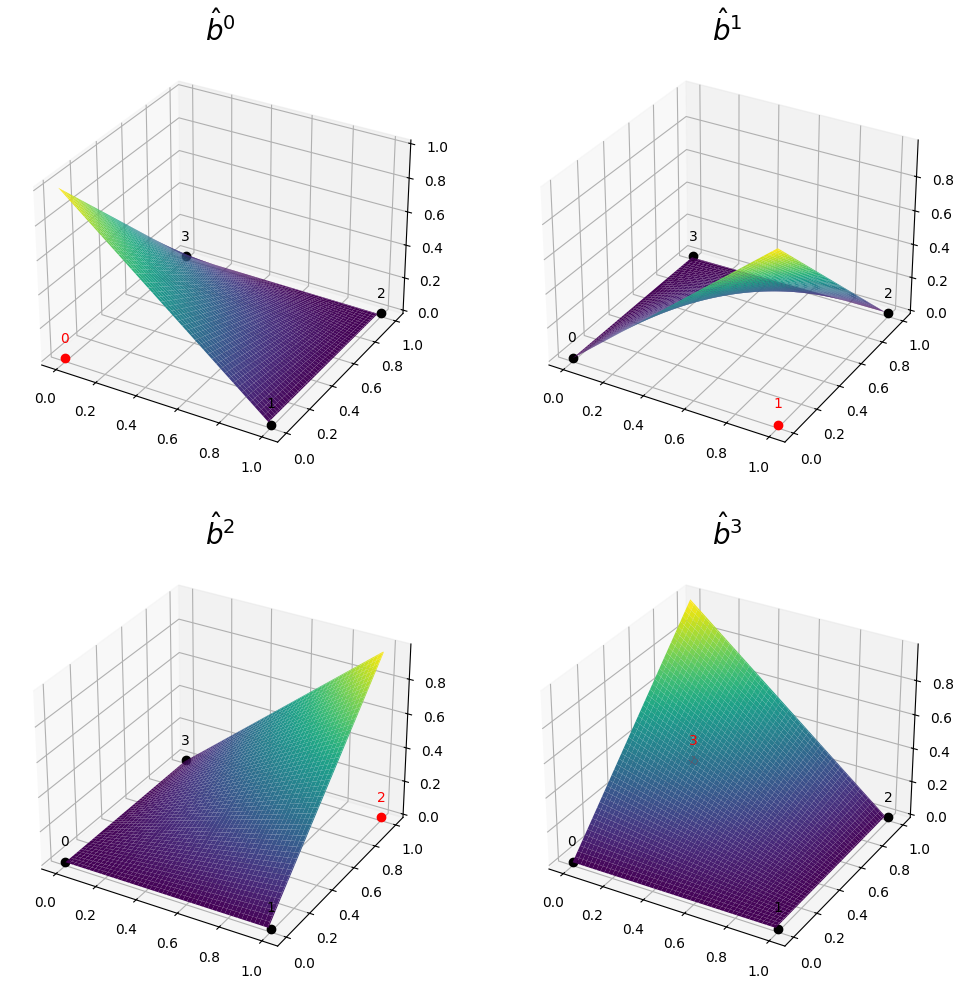

In [6]:
plt.clf()

fig = plt.figure(figsize=(12, 12))

xi = np.linspace(0, 1, 200)
yi = np.linspace(0, 1, 200)
X, Y = np.meshgrid(xi, yi)

axs = np.array([None]*4)

for i in range(0, 4):
    axs[i] = fig.add_subplot(2, 2, i+1, projection='3d')

    # Interpolate surface
    x = global_basis_data["x"]
    y = global_basis_data["y"]
    z = global_basis_data[f"v_{i}"]
    Z = griddata((x, y), z, (X, Y), method='cubic')

    # Plot surface
    axs[i].plot_surface(X, Y, Z, cmap='viridis')
    axs[i].set_title("$\\hat{b}^"+f"{i}$", fontsize=20)

# add the 4 degrees of freedom on the four plots 
for i in range(0, 4):
    axs[i].plot(0, 0, 0, marker="o", color=("red" if i == 0 else "black"))
    axs[i].text(0, 0, 0.1, '0', color=("red" if i == 0 else "black"), ha='center')

    axs[i].plot(1, 0, 0, marker="o", color=("red" if i == 1 else "black"))
    axs[i].text(1, 0, 0.1, '1', color=("red" if i == 1 else "black"), ha='center')


    axs[i].plot(1, 1, 0, marker="o", color=("red" if i == 2 else "black"))
    axs[i].text(1, 1, 0.1, '2', color=("red" if i == 2 else "black"), ha='center')

    axs[i].plot(0, 1, 0, marker="o", color=("red" if i == 3 else "black"))
    axs[i].text(0, 1, 0.1, "3", color=("red" if i == 3 else "black"), ha='center')

